<h1>EDA QUANTITATIVE</h1>

<h3>Plan: </h3>
<ol>
    <li>Séparation des variable quantitative</li>
    <li>Vérification des bruits</li>
    <li>Statistique descriptive</li>
    <li>Analyse de la distribution des données</li>
    <li>Valeur manquante (Missing value)
        <ul>
            <li>Detéction des valeur manquante</li>
            <li>Traitement des valeurs manquantes</li>
        </ul>
    </li>
    <li>Valeur aberrante (Outliers)</li>
    <li>Analyse des corrélation</li>
    <li>Export des résultats</li>
</ol>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [23]:
df = pd.read_csv("../data/data_v1.csv",sep=';',error_bad_lines = False)

In [24]:
df.head()

,Bathrooms,Bedrooms,Erf_size,Floor_size,Garages,Listing_date,Listing_number,Pet_friendly,Price,Town,...,No_pets_allowed,Furnished,Flatlet,Fibre_internet,Furnished_optional,ADSL_internet,Satellite_internet,Fixed_wimax_internet,month,year
0,3.0,3.0,304.0,326.0,2.0,2020-07-10,108859219,1.0,6480000.0,"Tokai, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2020
1,3.0,3.0,NaN,140.0,2.0,2020-09-23,109153971,1.0,6250000.0,"14 Graham Road, Sea Point, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2020
2,3.5,4.0,659.0,300.0,2.0,2020-09-23,109154367,NaN,13950000.0,"Camps Bay, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2020
3,1.0,2.0,NaN,NaN,NaN,2020-09-23,109154455,NaN,1050000.0,"Ottery, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2020
4,1.0,1.0,NaN,61.0,NaN,2020-07-23,108907258,NaN,1265000.0,"Muizenberg, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2020


<h2>1) Séparation de variables quantitative</h2>

In [25]:
variable_qualitative = []
variable_quantitative = []


#Séparer les variables
for variable in df.columns.tolist():
    if df.dtypes[variable] in ['float64', 'int64'] and not variable in ["year", "month"]:
        variable_quantitative.append(variable)
    else :
        variable_qualitative.append(variable)
        
        
#Placer le label en dernier place
ordered_variable_quantitative = []
for feature in variable_quantitative:
    if feature != 'Price': 
        ordered_variable_quantitative.append(feature)
ordered_variable_quantitative.append('Price')
variable_quantitative = ordered_variable_quantitative

In [26]:
variable_quantitative

['Bathrooms',
 'Bedrooms',
 'Erf_size',
 'Floor_size',
 'Garages',
 'Listing_number',
 'Pet_friendly',
 'Garden',
 'Pool',
 'Secure_parking',
 'Parking',
 'No_pets_allowed',
 'Furnished',
 'Flatlet',
 'Fibre_internet',
 'Furnished_optional',
 'ADSL_internet',
 'Satellite_internet',
 'Fixed_wimax_internet',
 'Price']

In [27]:
variable_qualitative

['Listing_date', 'Town', 'Type_of_property', 'month', 'year']

<h2>2) Vérification des bruit</h2>

In [28]:
bruit = pd.DataFrame(columns=["feature","count"])
count = []
features = []
for feature in variable_quantitative :
    count.append( sum(n < 0 for n in df[feature]) )
    features.append(feature)
bruit["feature"] =  features
bruit["count"] =  count

print(bruit)

                 feature  count
0              Bathrooms      0
1               Bedrooms      0
2               Erf_size      0
3             Floor_size      0
4                Garages      0
5         Listing_number      0
6           Pet_friendly      0
7                 Garden      0
8                   Pool      0
9         Secure_parking      0
10               Parking      0
11       No_pets_allowed      0
12             Furnished      0
13               Flatlet      0
14        Fibre_internet      0
15    Furnished_optional      0
16         ADSL_internet      0
17    Satellite_internet      0
18  Fixed_wimax_internet      0
19                 Price      0


<h2>3) Statistique descriptive</h2>

In [29]:
df.describe()

,Bathrooms,Bedrooms,Erf_size,Floor_size,Garages,Listing_number,Pet_friendly,Price,Garden,Pool,...,No_pets_allowed,Furnished,Flatlet,Fibre_internet,Furnished_optional,ADSL_internet,Satellite_internet,Fixed_wimax_internet,month,year
count,7812.000000,7661.000000,3.635000e+03,5869.000000,3732.000000,7.901000e+03,2026.0,7.846000e+03,2030.0,2735.0,...,1319.0,299.0,414.0,795.0,22.0,40.0,12.0,1.0,7901.000000,7901.000000
mean,2.059908,2.615651,3.072695e+04,144.080763,1.641881,1.084730e+08,1.0,5.658831e+06,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.867865,2019.703962
std,1.452088,1.629366,1.578416e+06,168.396558,0.921994,7.972524e+05,0.0,8.081759e+06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.805105,0.593484
min,0.500000,0.500000,5.000000e+00,17.000000,1.000000,1.003926e+08,1.0,1.990000e+05,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,2015.000000
25%,1.000000,2.000000,1.665000e+02,61.000000,1.000000,1.082583e+08,1.0,1.850000e+06,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.000000,2020.000000
50%,2.000000,2.000000,4.250000e+02,90.000000,1.000000,1.087737e+08,1.0,2.995000e+06,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.000000,2020.000000
75%,2.500000,3.000000,7.900000e+02,162.000000,2.000000,1.089901e+08,1.0,5.990000e+06,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.000000,2020.000000
max,30.000000,33.000000,9.490000e+07,4029.000000,20.000000,1.091545e+08,1.0,1.725000e+08,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.000000,2020.000000


In [30]:
def stat_descriptive(df,variable_quantitative):
    tab = pd.DataFrame(columns=["feature","mean", "Q1", "median", "Q3", "variance", "mode", "IQR"])
    mean    = []
    median  = []
    q1      = []
    q3      = []
    variance= []
    mode    = []
    IQR     = []
    features= []
    
    for feature in variable_quantitative:
        features.append(feature)
        mean.append(df[feature].mean())
        variance.append(df[feature].var())
        mode.append(df[feature].mode())
        median.append(df.describe()[feature]["50%"])
        q1.append(df.describe()[feature]["25%"])
        q3.append(df.describe()[feature]["75%"])
        IQR.append(df.describe()[feature]["75%"]-df.describe()[feature]["25%"])

    tab['feature']  = features
    tab['mean']     = mean
    tab['median']   = median
    tab['variance'] = variance
    tab['mode']     = mode
    tab['Q1']       = q1
    tab['Q3']       = q3
    tab['IQR']      = IQR
    return tab

In [31]:
stat_descriptive(df,variable_quantitative)

,feature,mean,Q1,median,Q3,variance,mode,IQR
0,Bathrooms,2.059908e+00,1.0,2.0,2.5,2.108560e+00,0 1.0 dtype: float64,1.5
1,Bedrooms,2.615651e+00,2.0,2.0,3.0,2.654835e+00,0 2.0 dtype: float64,1.0
2,Erf_size,3.072695e+04,166.5,425.0,790.0,2.491396e+12,0 496.0 dtype: float64,623.5
3,Floor_size,1.440808e+02,61.0,90.0,162.0,2.835740e+04,0 43.0 dtype: float64,101.0
4,Garages,1.641881e+00,1.0,1.0,2.0,8.500734e-01,0 1.0 dtype: float64,1.0
5,Listing_number,1.084730e+08,108258251.0,108773652.0,108990121.0,6.356114e+11,0 103882700 1 105005885 2 10578...,731870.0
6,Pet_friendly,1.000000e+00,1.0,1.0,1.0,0.000000e+00,0 1.0 dtype: float64,0.0
7,Garden,1.000000e+00,1.0,1.0,1.0,0.000000e+00,0 1.0 dtype: float64,0.0
8,Pool,1.000000e+00,1.0,1.0,1.0,0.000000e+00,0 1.0 dtype: float64,0.0
9,Secure_parking,2.018018e+00,1.0,2.0,2.0,2.625239e+00,0 1.0 dtype: float64,1.0


<h2>4) Analyse de la distribution des données</h2>

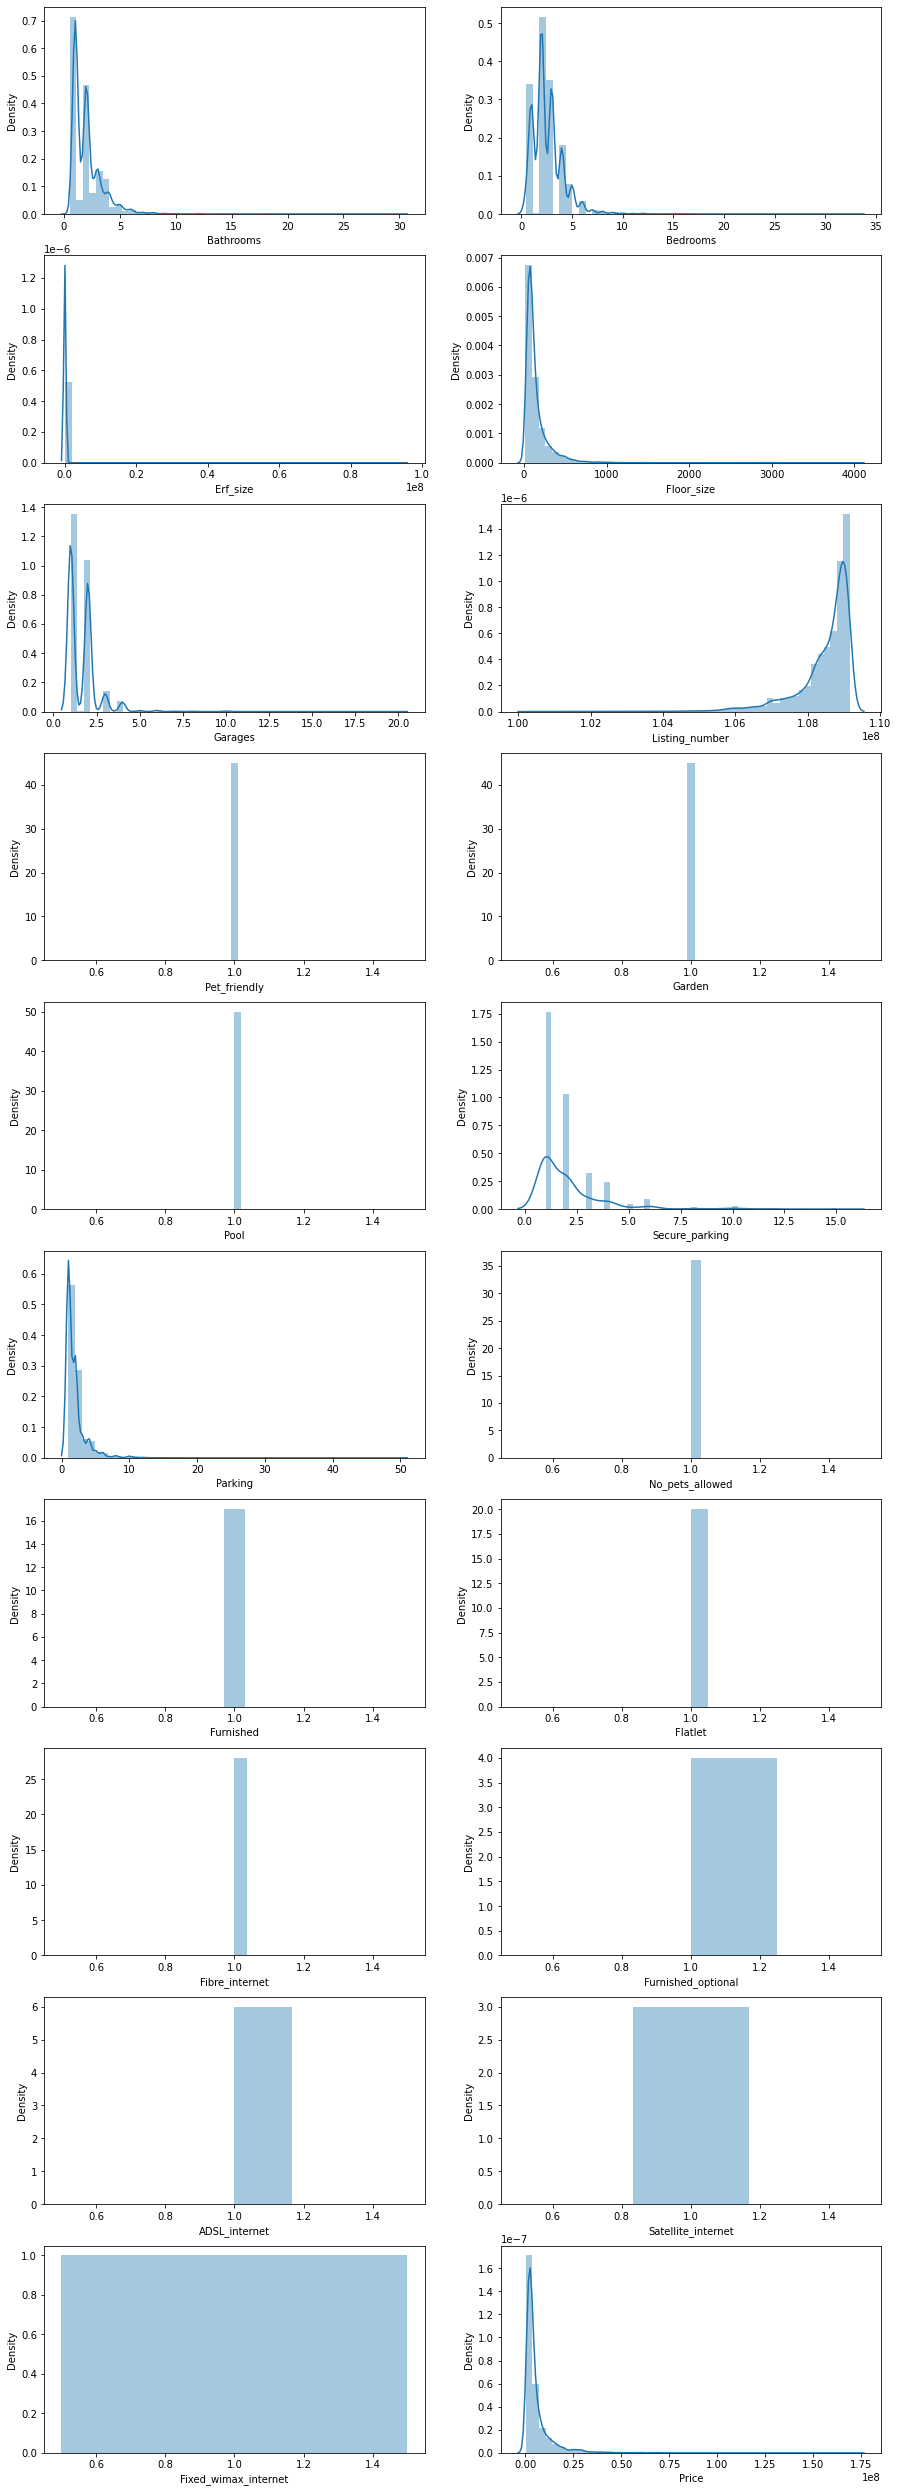

In [32]:
import warnings
warnings.filterwarnings("ignore")
nb_line = int(len(variable_quantitative)/2)
nb_column = 2
f, axes = plt.subplots(nb_line, nb_column, figsize=(15, 45), sharex=False)

i,j =0, 0
for col in variable_quantitative:
    if j == 2:
        j = 0
        i = i+1
    sns.distplot(df[col],ax=axes[i, j])
    j=j+1

<h2>5) Valeur manquante (Missing value)</h2>

<h3>a - Detéction des valeur manquante</h3>

In [33]:
def get_missing_value(df,variable_quantitative):
    tab   = pd.DataFrame(columns=["feature","count","frequence(%)"])
    count    = []
    freq     = []
    features = []
    
    for feature in variable_quantitative:
        count.append(df[feature].isnull().sum())
        freq.append(round(df[feature].isnull().sum()*100/df.shape[0],2))
        features.append(feature)
        
    tab["count"]        = count
    tab["frequence(%)"] = freq
    tab["feature"]      = features
    
    return tab

In [34]:
get_missing_value(df,variable_quantitative)

,feature,count,frequence(%)
0,Bathrooms,89,1.13
1,Bedrooms,240,3.04
2,Erf_size,4266,53.99
3,Floor_size,2032,25.72
4,Garages,4169,52.77
5,Listing_number,0,0.00
6,Pet_friendly,5875,74.36
7,Garden,5871,74.31
8,Pool,5166,65.38
9,Secure_parking,7235,91.57


<h3>b - Traitement des valeurs manquantes</h3>

<ul>
<li>Les variables : Bathrooms, Bedrooms, Price ont un pourcentage de valeur manquante très faible.On va le supprimer</li>
</ul>

In [35]:
df = df.dropna(subset = ["Bedrooms"],axis=0) 
df = df.dropna(subset = ["Bathrooms"],axis=0) 
df = df.dropna(subset = ["Price"],axis=0) 

<ul>
<li>Pour les variables : Erf Size, Floor Size, Garages, Parking On va appliquer une imputation mediane </li>
</ul>

In [36]:
df['Erf_size']   = df['Erf_size'].replace(np.nan, df.describe()['Erf_size']["50%"])
df['Floor_size'] = df['Floor_size'].replace(np.nan, df.describe()['Floor_size']["50%"])
df['Garages']    = df['Garages'].replace(np.nan, df.describe()['Garages']["50%"])
df['Parking']    = df['Parking'].replace(np.nan, df.describe()['Parking']["50%"])

<ul>
    <li>
        <p>Pour les variables: </p>
        <ul>    
            <li>Secure_parking</li>
            <li>Pet Friendly</li>
            <li>Garden</li>
            <li>Pool</li>
            <li>No Pets Allowed</li>
            <li>Furnished</li>
            <li>Flatlet</li>
            <li>Fibre Internet</li>
            <li>Furnished (Optional)</li>
            <li>ADSL Internet</li>
            <li>Satellite Internet</li>
            <li>Fixed WiMax Internet </li>
        </ul>
        <p>on va remplacer les NaN par des 0 </p>
    </li>
</ul>

In [37]:
df['Secure_parking']       = df['Secure_parking'].fillna(0)
df['Pet_friendly']         = df['Pet_friendly'].fillna(0)
df['Garden']               = df['Garden'].fillna(0)
df['Pool']                 = df['Pool'].fillna(0)
df['No_pets_allowed']      = df['No_pets_allowed'].fillna(0)
df['Furnished']            = df['Furnished'].fillna(0)
df['Flatlet']              = df['Flatlet'].fillna(0)
df['Fibre_internet']       = df['Fibre_internet'].fillna(0)
df['Furnished_optional']   = df['Furnished_optional'].fillna(0)
df['ADSL_internet']        = df['ADSL_internet'].fillna(0)
df['Satellite_internet']   = df['Satellite_internet'].fillna(0)
df['Fixed_wimax_internet'] = df['Fixed_wimax_internet'].fillna(0)

In [38]:
get_missing_value(df,variable_quantitative)

,feature,count,frequence(%)
0,Bathrooms,0,0.0
1,Bedrooms,0,0.0
2,Erf_size,0,0.0
3,Floor_size,0,0.0
4,Garages,0,0.0
5,Listing_number,0,0.0
6,Pet_friendly,0,0.0
7,Garden,0,0.0
8,Pool,0,0.0
9,Secure_parking,0,0.0


<h2>6) Valeur aberrante (Outliers)</h2>

In [39]:
def get_outliers(df,variable_quantitative):
    tab   = pd.DataFrame(columns=["feature","count","frequence(%)","outliers1","outliers2"])
    count    = []
    freq     = []
    features = []
    ab1 = []
    ab2 = []
    
    for feature in variable_quantitative:
        Q1 = df.describe()[feature]["25%"]
        Q3 = df.describe()[feature]["75%"]
        IQR= Q3 - Q1
        val1 = df[df[feature]<Q1-1.5*IQR] 
        val2 = df[df[feature]>Q3+1.5*IQR]
        count.append(len(val1)+len(val2))
        ab1.append(Q1-1.5*IQR)
        ab2.append(Q1+1.5*IQR)
        freq.append(round((len(val1)+len(val2))*100/df.shape[0],2))
        features.append(feature)
        
    tab["count"]        = count
    tab["frequence(%)"] = freq
    tab["feature"]      = features
    tab["outliers1"]      = ab1
    tab["outliers2"]      = ab2
  
    return tab

In [40]:
get_outliers(df,variable_quantitative)

,feature,count,frequence(%),outliers1,outliers2
0,Bathrooms,362,4.77,-1.250000e+00,3.250000e+00
1,Bedrooms,698,9.19,5.000000e-01,3.500000e+00
2,Erf_size,3528,46.45,4.305000e+02,4.305000e+02
3,Floor_size,982,12.93,-1.500000e+01,1.590000e+02
4,Garages,1789,23.55,1.000000e+00,1.000000e+00
5,Listing_number,557,7.33,1.071534e+08,1.093581e+08
6,Pet_friendly,0,0.00,-1.500000e+00,1.500000e+00
7,Garden,0,0.00,-1.500000e+00,1.500000e+00
8,Pool,0,0.00,-1.500000e+00,1.500000e+00
9,Secure_parking,645,8.49,0.000000e+00,0.000000e+00


<p>Le valeur aberrante ne seront pas modifier.</p>

<h2>7) Analyse des corrélation</h2>

<AxesSubplot:>

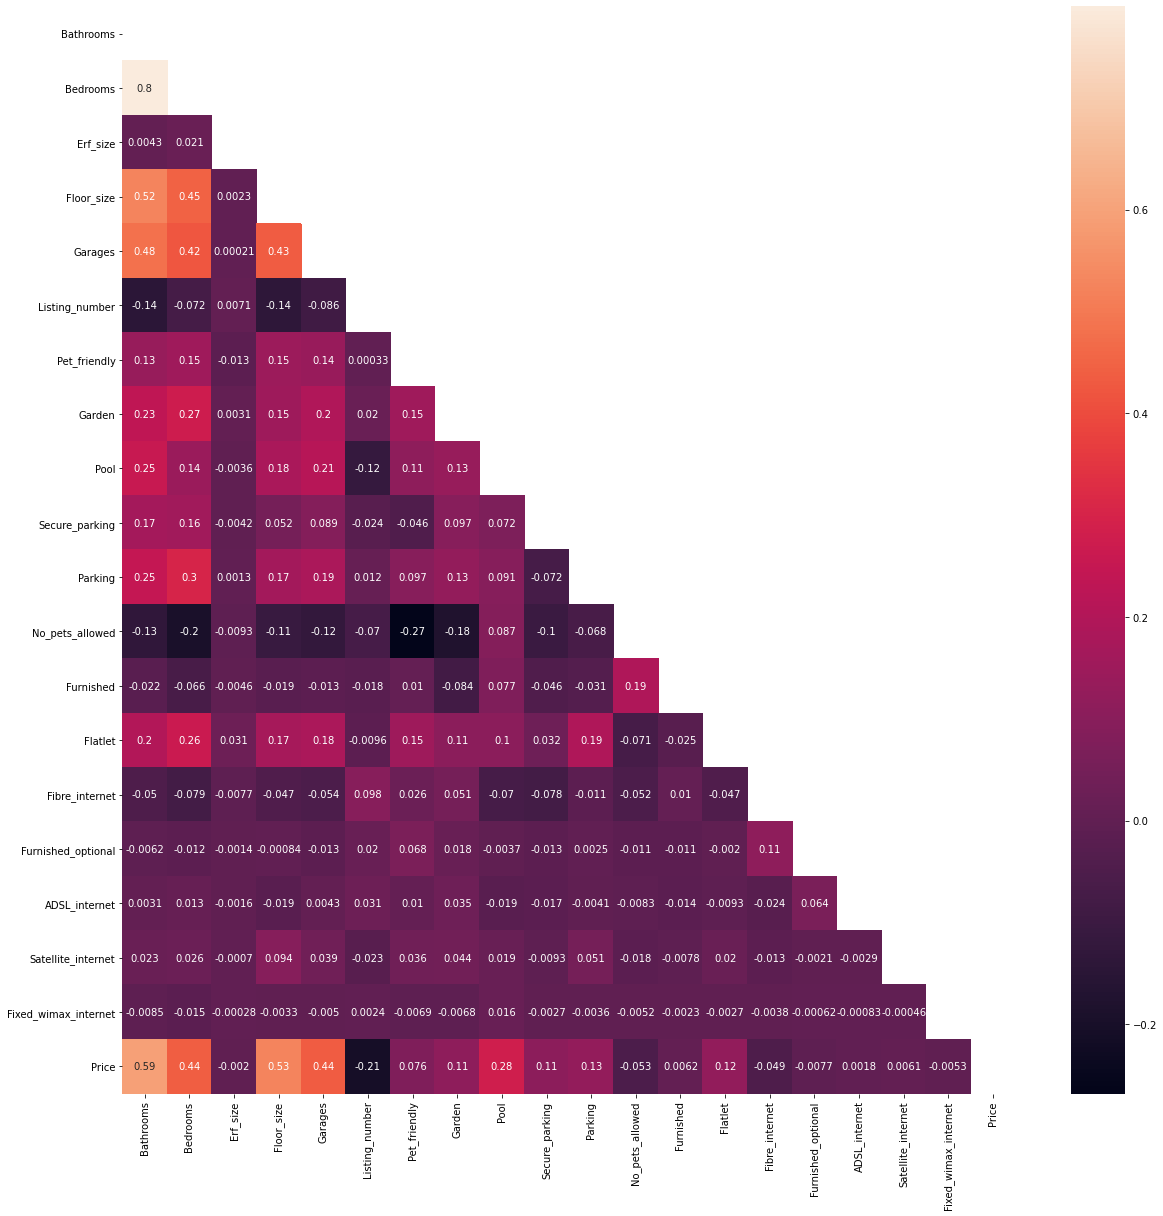

In [41]:
f, axes = plt.subplots(1, 1, figsize=(20, 20), sharex=False)
matrix = np.triu(df[variable_quantitative].corr())
sns.heatmap(df[variable_quantitative].corr(), annot=True,robust=False, mask=matrix, ax=axes)

<h2>8) Export des résultats</h2>

In [42]:
df.to_csv("../data/data_v2.csv",sep=";",index=False)